In [22]:
# Importing Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier  
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [2]:
pip install protobuf==3.20.*


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pip install seaborn==0.12.1

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier  
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [26]:
# reading dataset 

data =pd.read_csv("D:\STUDY\Academic Project\BE Project\joint.csv")
data.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
data.shape

(116000, 1025)

In [27]:
# Count the number of unique classes
num_classes = len(data["character"].unique())

print("Number of classes: ", num_classes)


Number of classes:  58


In [28]:
#splitting the Data
# converting into 0 - 1 range 
X=data.iloc[:,:-1]/255

y=data.iloc[:,-1].values
y

array([ 1,  1,  1, ..., 58, 58, 58], dtype=int64)

In [29]:
# print unique characters 
char_names=data.character.unique()
char_names


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58], dtype=int64)

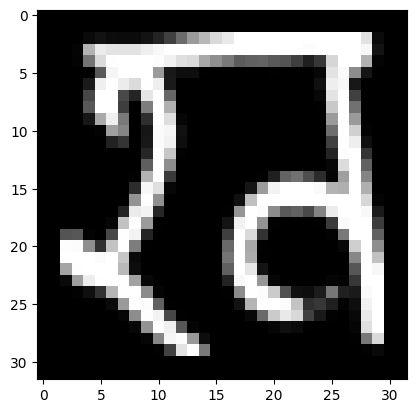

In [8]:
# Visualizing single character 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("joint.csv")

# retrieve pixel values for the first character
pixels = data.iloc[2000, :-1].values.astype('float64')

# reshape into a 32x32 grayscale image
image = pixels.reshape((32, 32))

# display the image
plt.imshow(image, cmap='gray')
plt.show()

In [30]:
# Creating class labels for 58 classes according to the dataset
# added by prachi 
word_dict = {
    0: 'क',
    1: 'ख',
    2: 'ग',
    3: 'घ',
    4: 'ङ',
    5: 'च',
    6: 'छ',
    7: 'ज',
    8: 'झ',
    9: 'ञ',
    10: 'ट',
    11: 'ठ',
    12: 'ड',
    13: 'ढ',
    14: 'ण',
    15: 'त',
    16: 'थ',
    17: 'द',
    18: 'ध',
    19: 'न',
    20: 'प',
    21: 'फ',
    22: 'ब',
    23: 'भ',
    24: 'म',
    25: 'य',
    26: 'र',
    27: 'ल',
    28: 'व',
    29: 'श',
    30: 'ष',
    31: 'स',
    32: 'ह',
    33: 'क्ष',
    34: 'त्र',
    35: 'ज्ञ',
    36: '0',
    37: '१',
    38: '२',
    39: '३',
    40: '४',
    41: '५',
    42: '६',
    43: '७',
    44: '८',
    45: '९',
    46: 'क्त',
    47: 'क्ष्म',
    48: 'ल्ल',
    49:  'न्य',
    50: 'स्था',
    51: 'ष्ट्र',
    52: 'व्ह',
    53: 'विना',
    54: '३ल',
    55: '५य',
    56: 'रुद्र',
    57: '१२%',
}


In [31]:
# Preprocessing stage 
#Splitting Data in to train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
%store X_train
%store X_test
%store y_train
%store y_test

Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)


In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(81200, 1024)
(81200,)
(34800, 1024)
(34800,)


In [15]:
# encoding labels into numeric values 

le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [16]:
y_train

array([44, 15, 56, ..., 51,  0,  7], dtype=int64)

In [33]:
print(X_train.shape)
print(X_test.shape)

(81200, 1024)
(34800, 1024)


In [ ]:
# Model Building 
# Random Forest (classifier)
RF= RandomForestClassifier(n_estimators= 100, criterion="entropy")  
RF.fit(X_train, y_train)

In [ ]:
#Predicting the test set result  
y_pred= RF.predict(X_test)

In [ ]:
# Measuring Accuracy 
from sklearn import metrics  
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)

In [ ]:
# performance evaluatio metrics

from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

In [15]:
# CNN
img_height_rows = 32
img_width_cols = 32

In [16]:
print(X_train.shape)
print(y_train.shape)

(81200, 1024)
(81200,)


In [34]:
im_shape = (img_height_rows, img_width_cols, 1)
X_train = X_train.values.reshape(X_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
X_test = X_test.values.reshape(X_test.shape[0], *im_shape)


# X_train = X_train.reshape(-1, 32, 32, 1)
# X_test = X_test.reshape(-1, 32, 32, 1)

In [35]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(34800, 32, 32, 1)
(81200, 32, 32, 1)
(34800,)
(81200,)


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

In [57]:
# Convert the target variable to categorical
y_train = np_utils.to_categorical(y_train, num_classes=58)
y_test = np_utils.to_categorical(y_test, num_classes=58)

In [ ]:
# Building CNN Model 

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(58, activation='softmax'))

In [30]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

from keras.models import save_model
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Saved trained model 
model.save("trained_model.h5")
# import os
# os.makedirs("./models", exist_ok=True)
# model.save('./models/model01.h5')

In [ ]:
import pickle

In [ ]:
# # saving model 
# filename = "trained_model.h5"
# pickle.dump(model,open(filename,'wb'))

In [58]:
# added by prachi 
# for creating array of zeros 

y_int = np.int0(y) - 1
count = np.zeros(58, dtype='int')
print(count)
for i in y_int:
   count[i] += 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Plot the model accuracy over increasing epochs
# Ploting graph 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'])

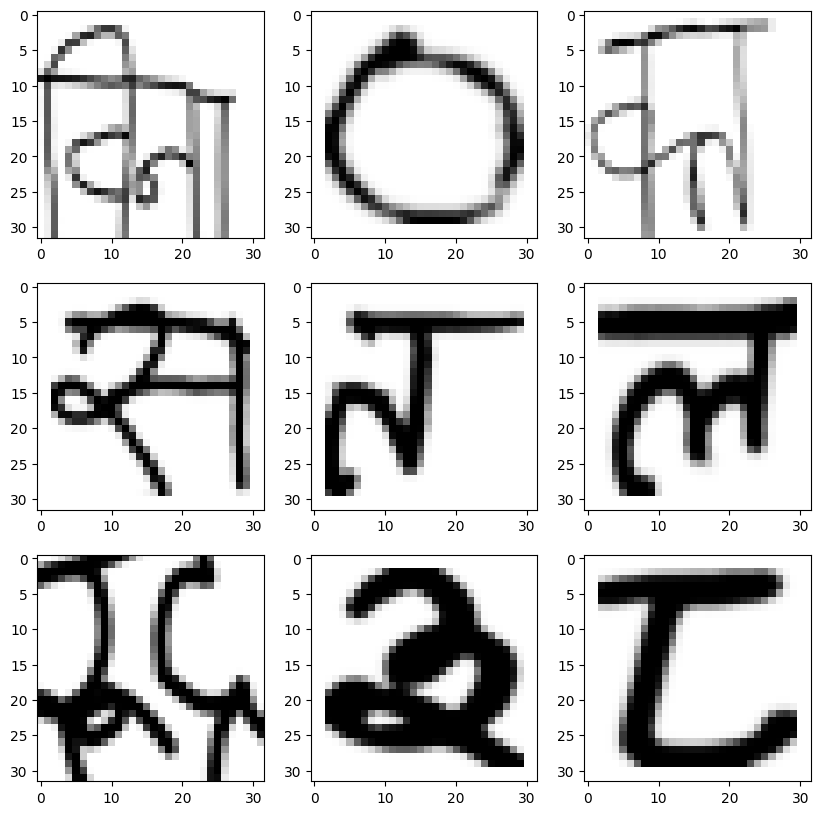

In [31]:
# Random char visualization from dataset 

import cv2
import numpy as np
from keras.models import load_model
from sklearn.utils import shuffle #For shuffling the Images data
shuff = shuffle(X_train[:10])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (32,32)), cmap="Greys")
plt.show()


In [56]:

# ***************************** Very IMP Code ****************************

# Prediction of input image taken from user 

import cv2
import numpy as np

model = tf.keras.models.load_model('./trained_model.h5')

# Take an input image for prediction
input_image_path = r"D:\STUDY\Academic Project\BE Project\char_2\image2_label1.png"

# Load the input image
input_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if input_image is None:
    print("Failed to load the input image.")
else:
    # Normalize the pixel values
    input_image_normalized = input_image / 255.0

    # Convert the input image to a numpy array
    input_image_array = np.array([input_image_normalized])

    # Make predictions using the trained model
    prediction = model.predict(input_image_array)

    # Get the predicted character
    predicted_class_index = np.argmax(prediction)
    predicted_character = word_dict[predicted_class_index]

    # Print the predicted character
    print("Predicted Character: " + predicted_character)



1/1 [==============================] - 0s 156ms/step
Predicted Character: विना


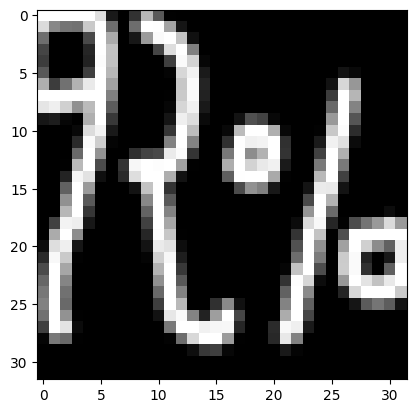

1/1 [==============================] - 0s 134ms/step
prediction: १२%


In [63]:
# added by Prachi IMP code 
# By taking image from test dataset csv row 

import tensorflow as tf
import cv2
import numpy as np

# Load the trained model for Devanagari character recognition
model = tf.keras.models.load_model('./trained_model.h5')

plt.gray()
test_img = X_test[29990]
imgplot = plt.imshow(test_img)
# print("label: ",y_test[10] )
# # print(X_test.shape)
plt.show()

# t = X_test.reshape(1,-1)
prediction = model.predict(np.expand_dims(test_img, axis=0))
pred = word_dict[np.argmax(prediction)]
print("prediction: " + pred)

# print(X_test.shape)
# print(y_test.shape)

# actual_label = word_dict[np.argmax(y_test[29945])]
# accuracy = 1 if actual_label == pred else 0

# print("Actual label: " + actual_label)
# print("Prediction: " + pred)
# print("Accuracy: {:.2%}".format(accuracy))


In [69]:
import gradio as gr
import cv2
import numpy as np
import matplotlib.pyplot as plt

def greet(input_image,number):
    plt.gray()
    # threshold = float(threshold)
    input_img(input_image)
    input_image = np.array(input_image)
    test_img = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
    imgplot = plt.imshow(test_img)
    plt.axis("off")  # Remove axis labels
    plt.show()
    prediction = model.predict(np.expand_dims(test_img, axis=0))
    pred = word_dict[np.argmax(prediction)]
    return "Prediction: " + pred 

image_input = gr.inputs.Image(label="Select an image", image_mode="L")
# threshold_input = gr.inputs.Slider(label="Threshold", minimum=0.0, maximum=1.0, step=0.1, default=0.5)
output = gr.outputs.Textbox(label="Prediction")

interface = gr.Interface(fn=greet, inputs=[image_input], outputs=output, capture_session=True)
interface.launch()


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_45704\588213226.py:22: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  interface = gr.Interface(fn=greet, inputs=[image_input], outputs=output, capture_session=True)


Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\routes.py", line 422, in run_predict
    output = await app.get_blocks().process_api(
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\blocks.py", line 1323, in process_api
    result = await self.call_function(
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\blocks.py", line 1051, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\_backends\_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\_backends\_asyncio.py", 